# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

In [1]:
import pandas as pd

# Load the dataset
file_path = "data/vehicles.csv"
df = pd.read_csv(file_path)

# Display the first few rows and summary information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [2]:
df.sample(10)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
215064,7316162426,minneapolis / st paul,4795,2008.0,hyundai,sonata,excellent,4 cylinders,gas,121600.0,clean,automatic,NaN,fwd,mid-size,sedan,silver,mn
424349,7309929607,milwaukee,7490,2007.0,honda,civic,excellent,NaN,gas,107260.0,clean,automatic,1HGFA16507L068258,fwd,NaN,sedan,NaN,wi
165518,7314157120,"kansas city, MO",6500,1997.0,ford,e350,good,8 cylinders,gas,278659.0,clean,automatic,NaN,rwd,full-size,NaN,white,ks
337053,7311078307,pittsburgh,7500,2012.0,kia,sorento,excellent,6 cylinders,gas,153149.0,clean,automatic,5XYKTDA27CG297273,4wd,NaN,SUV,black,pa
412766,7311477339,yakima,12950,2000.0,ford,f350 super duty xlt,NaN,10 cylinders,gas,182730.0,clean,automatic,1FTSX31S0YED21735,4wd,NaN,truck,NaN,wa
340645,7310218238,williamsport,30990,2018.0,buick,enclave essence sport,good,6 cylinders,gas,41466.0,clean,other,5GAEVAKW4JJ166789,NaN,NaN,other,black,pa
210231,7315678622,upper peninsula,12995,2008.0,gmc,sierra 1500 sle,excellent,8 cylinders,gas,155500.0,clean,automatic,2GTEK13M381269372,4wd,full-size,pickup,silver,mi
307931,7316596463,tulsa,9995,2008.0,chevrolet,silverado 1500,excellent,8 cylinders,gas,149500.0,clean,automatic,1GCEC19J18Z293848,rwd,full-size,truck,blue,ok
179791,7310347954,maine,12999,2013.0,hyundai,santa fe,NaN,NaN,gas,108616.0,clean,automatic,NaN,fwd,NaN,wagon,orange,me
378932,7309503739,mcallen / edinburg,15500,2008.0,NaN,Freightliner,good,NaN,diesel,750000.0,clean,manual,NaN,NaN,NaN,NaN,NaN,tx


### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

The dataset contains 426,880 rows and 18 columns, with many missing values in critical columns like year, manufacturer, model, condition, and more. Here’s a breakdown of key columns:

price: The target variable we're analyzing (no missing values).
year, manufacturer, model, condition, odometer, cylinders, fuel, transmission, drive, and paint_color: Potential features for modeling but contain missing values.
region, state: Geographic information.
VIN: Likely irrelevant for this task as it's unique for each vehicle.
title_status and type: Additional features.

In [3]:
# Handle missing values for important features
# For now, we'll drop rows where price or year is missing since these are crucial features
df_cleaned = df.dropna(subset=['price', 'year', 'odometer'])

# Let's examine the remaining missing data percentage after this drop
missing_data_percentage = df_cleaned.isnull().mean() * 100

# Display the missing data percentage for each column
missing_data_percentage

id               0.000000
region           0.000000
price            0.000000
year             0.000000
manufacturer     3.860741
model            1.232959
condition       40.464086
cylinders       41.476561
fuel             0.515493
odometer         0.000000
title_status     1.746317
transmission     0.402284
VIN             37.813046
drive           30.580476
size            71.583314
type            21.783151
paint_color     30.400338
state            0.000000
dtype: float64

The cleaned dataset still has a significant amount of missing data in several key columns:

- condition (40% missing)
- cylinders (41% missing)
- VIN (37% missing, likely not relevant for analysis)
- drive (30% missing)
- size (71% missing, could be dropped due to high missing rate)
- paint_color (30% missing)

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [4]:
# Drop columns with too many missing values or irrelevant for analysis
df_reduced = df_cleaned.drop(columns=['VIN', 'size'])

# For the remaining missing values, we will use simple imputation:
# - Fill missing categorical variables with 'unknown'
# - Fill missing numerical variables with the median value

df_reduced['condition'].fillna('unknown', inplace=True)
df_reduced['cylinders'].fillna('unknown', inplace=True)
df_reduced['fuel'].fillna('unknown', inplace=True)
df_reduced['drive'].fillna('unknown', inplace=True)
df_reduced['paint_color'].fillna('unknown', inplace=True)
df_reduced['manufacturer'].fillna('unknown', inplace=True)
df_reduced['model'].fillna('unknown', inplace=True)
df_reduced['title_status'].fillna('unknown', inplace=True)

# Let's review the dataset after this imputation
df_reduced.isnull().mean() * 100

id               0.000000
region           0.000000
price            0.000000
year             0.000000
manufacturer     0.000000
model            0.000000
condition        0.000000
cylinders        0.000000
fuel             0.000000
odometer         0.000000
title_status     0.000000
transmission     0.402284
drive            0.000000
type            21.783151
paint_color      0.000000
state            0.000000
dtype: float64

In [5]:
import matplotlib.pyplot as plt

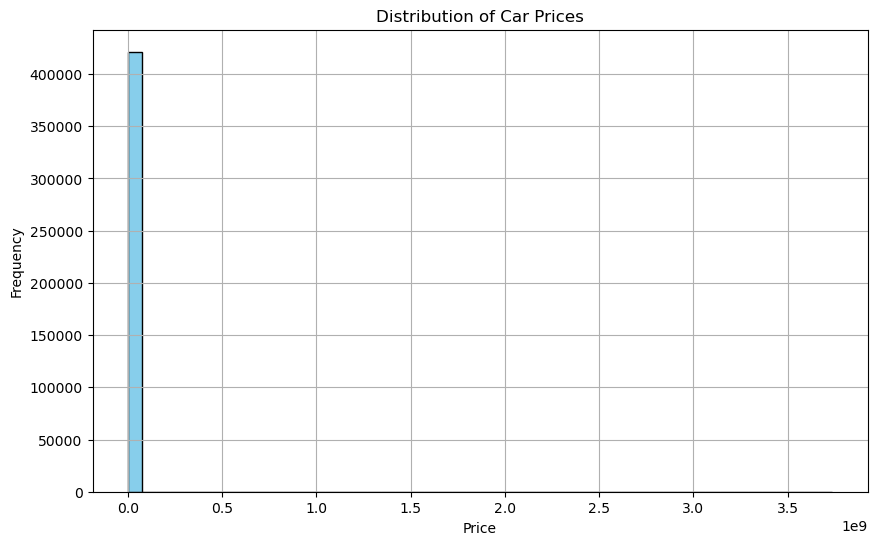

In [6]:
# Plotting the distribution of 'price'
plt.figure(figsize=(10, 6))
df_reduced['price'].plot(kind='hist', bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

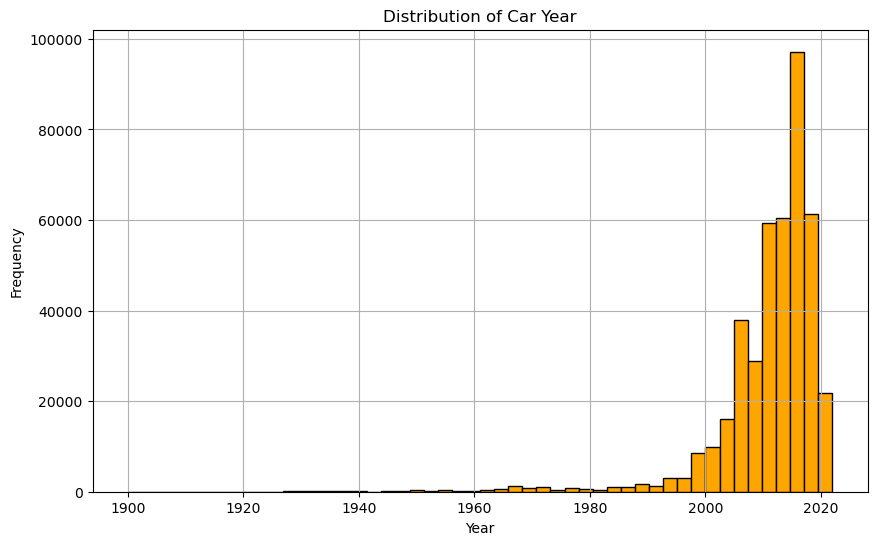

In [7]:
# Plotting the distribution of 'year'
plt.figure(figsize=(10, 6))
df_reduced['year'].plot(kind='hist', bins=50, color='orange', edgecolor='black')
plt.title('Distribution of Car Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

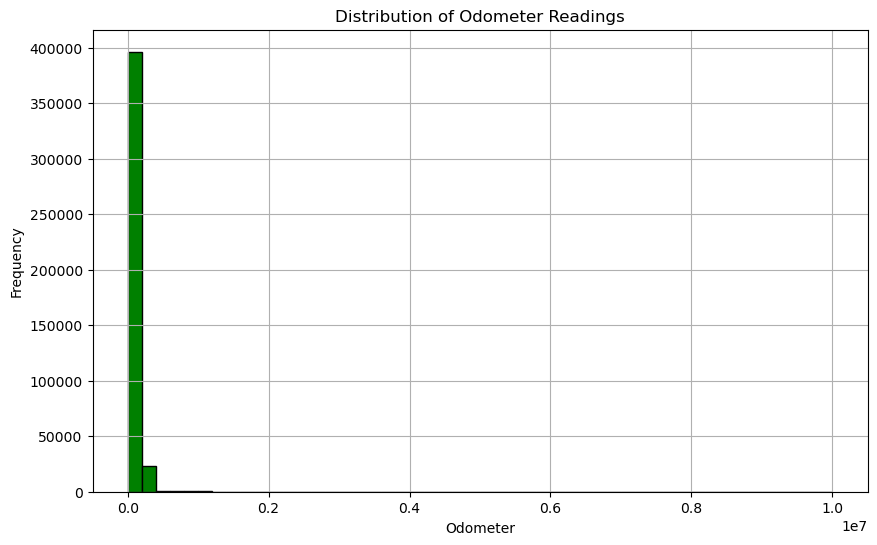

In [8]:
# Plotting the distribution of 'odometer'
plt.figure(figsize=(10, 6))
df_reduced['odometer'].plot(kind='hist', bins=50, color='green', edgecolor='black')
plt.title('Distribution of Odometer Readings')
plt.xlabel('Odometer')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [9]:
# Checking correlation between price and numerical variables
correlation_matrix = df_reduced[['price', 'year', 'odometer']].corr()

# Display correlation matrix
correlation_matrix

,price,year,odometer
price,1.000000,-0.004940,0.010032
year,-0.004940,1.000000,-0.157215
odometer,0.010032,-0.157215,1.000000


<Figure size 1200x600 with 0 Axes>

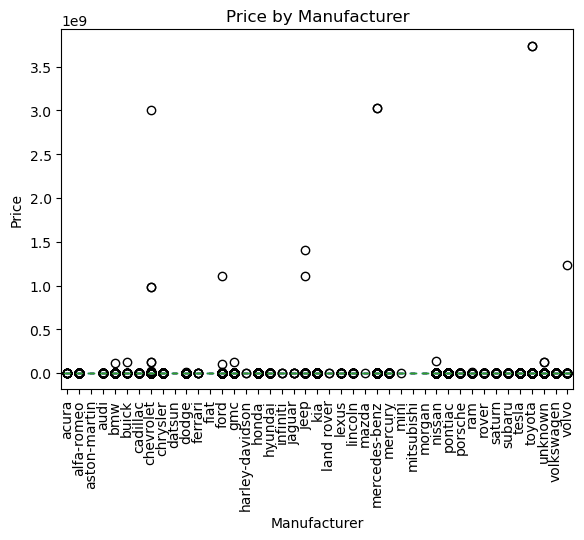

In [10]:
# Plotting boxplots to visualize the relationship between price and key categorical variables

# Manufacturer vs Price
plt.figure(figsize=(12, 6))
df_reduced.boxplot(column='price', by='manufacturer', grid=False, rot=90)
plt.title('Price by Manufacturer')
plt.suptitle('')
plt.xlabel('Manufacturer')
plt.ylabel('Price')
plt.show()

<Figure size 1000x600 with 0 Axes>

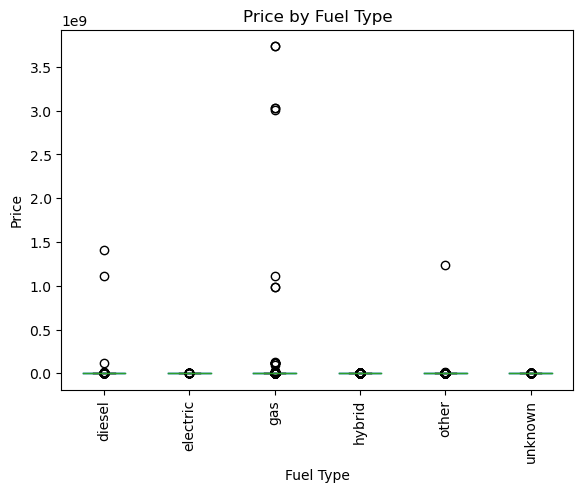

In [11]:
# Fuel vs Price
plt.figure(figsize=(10, 6))
df_reduced.boxplot(column='price', by='fuel', grid=False, rot=90)
plt.title('Price by Fuel Type')
plt.suptitle('')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.show()

<Figure size 1000x600 with 0 Axes>

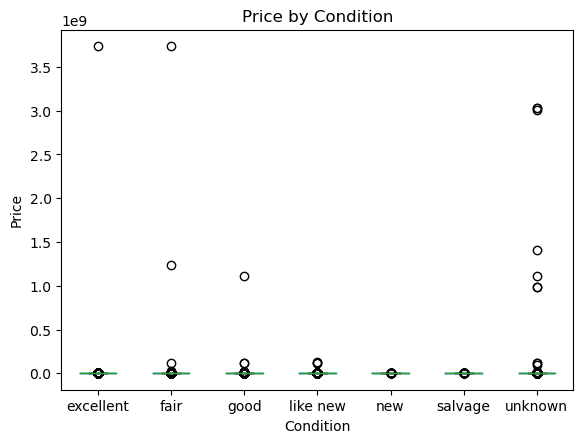

In [12]:
# Condition vs Price
plt.figure(figsize=(10, 6))
df_reduced.boxplot(column='price', by='condition', grid=False)
plt.title('Price by Condition')
plt.suptitle('')
plt.xlabel('Condition')
plt.ylabel('Price')
plt.show()

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

#### Linear Regression

In [13]:
# Re-importing necessary libraries and data since the previous context was lost
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

# Reload the dataset
file_path = "data/vehicles.csv"
df = pd.read_csv(file_path)

# Step 1: Preprocess the dataset
df_cleaned = df.dropna(subset=['price', 'year', 'odometer'])
df_reduced = df_cleaned.drop(columns=['VIN', 'size'])

# Impute missing values without using `inplace=True`
df_reduced['condition'] = df_reduced['condition'].fillna('unknown')
df_reduced['cylinders'] = df_reduced['cylinders'].fillna('unknown')
df_reduced['fuel'] = df_reduced['fuel'].fillna('unknown')
df_reduced['drive'] = df_reduced['drive'].fillna('unknown')
df_reduced['paint_color'] = df_reduced['paint_color'].fillna('unknown')
df_reduced['manufacturer'] = df_reduced['manufacturer'].fillna('unknown')
df_reduced['model'] = df_reduced['model'].fillna('unknown')
df_reduced['title_status'] = df_reduced['title_status'].fillna('unknown')

# Sampling 10% of the data for faster processing
df_sampled = df_reduced.sample(frac=0.1, random_state=42)

# Encode the categorical columns using LabelEncoder
label_encoders = {}
categorical_cols = ['manufacturer', 'model', 'condition', 'cylinders', 'fuel', 
                    'title_status', 'transmission', 'drive', 'type', 'paint_color', 'state', 'region']

df_encoded = df_sampled.copy()

for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
    label_encoders[col] = le

# Define the features (X) and target (y)
X = df_encoded.drop(columns=['price', 'id'])  # Dropping 'price' as it is the target and 'id' as it's not relevant
y = df_encoded['price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = lin_reg.predict(X_test)

# Display the model coefficients and intercept
coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lin_reg.coef_
}).sort_values(by='Coefficient', ascending=False)

intercept = lin_reg.intercept_

# Print the results
print("Linear Regression Model Coefficients:")
print(coefficients)
print(f"\nIntercept: {intercept}")

# Print the first few predicted prices and compare with actual prices
print("\nSample Predictions (first 5):")
print(pd.DataFrame({'Predicted Price': y_pred[:5], 'Actual Price': y_test[:5].values}))

Linear Regression Model Coefficients:
         Feature  Coefficient
9   transmission  3239.531399
5      cylinders  1251.325941
1           year   396.149951
11          type   222.579795
4      condition    89.771733
13         state     4.731803
3          model     0.273636
7       odometer    -0.006627
0         region    -5.241114
2   manufacturer   -85.520169
12   paint_color  -191.381282
8   title_status  -448.080361
10         drive -1454.400482
6           fuel -2727.939280

Intercept: -778681.9570119883

Sample Predictions (first 5):
   Predicted Price  Actual Price
0     15623.650128             0
1     14581.591409          9999
2      6531.701392          5900
3     11632.056611         12900
4     25920.355268             0


#### Random Forest

In [15]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Assuming df_reduced has already been cleaned and prepared
# df_reduced should already have the required preprocessing steps applied, such as filling missing values

# Prepare the data for modeling
df_encoded = df_reduced.copy()  # Make a copy of the dataset for encoding
label_encoders = {}

# Categorical columns to be encoded
categorical_cols = ['manufacturer', 'model', 'condition', 'cylinders', 'fuel', 
                    'title_status', 'transmission', 'drive', 'type', 'paint_color', 'state', 'region']

# Encode the categorical columns using LabelEncoder
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
    label_encoders[col] = le

# Define the features (X) and target (y)
X = df_encoded.drop(columns=['price', 'id'])  # Dropping 'price' as it is the target and 'id' as it's not relevant
y = df_encoded['price']  # Target variable is 'price'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get the feature importances from the trained Random Forest model
feature_importances = rf_model.feature_importances_

# Create a DataFrame to store and display the feature importances
features = X.columns  # List of feature names
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

# Display the feature importance DataFrame using print (or use display if in a Jupyter environment)
print("Top Features Based on Random Forest Regressor:")
print(feature_importance_df.head())  # Display the top 5 important features

Top Features Based on Random Forest Regressor:
      Feature  Importance
7    odometer    0.157769
3       model    0.151898
0      region    0.129729
13      state    0.115030
5   cylinders    0.078899


#### Descision Tree

In [16]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder

# Load the dataset
file_path =  "data/vehicles.csv"
df = pd.read_csv(file_path)

# Step 1: Preprocess the dataset
df_cleaned = df.dropna(subset=['price', 'year', 'odometer'])
df_reduced = df_cleaned.drop(columns=['VIN', 'size'])

# Step 2: Impute missing values without using `inplace=True`
df_reduced['condition'] = df_reduced['condition'].fillna('unknown')
df_reduced['cylinders'] = df_reduced['cylinders'].fillna('unknown')
df_reduced['fuel'] = df_reduced['fuel'].fillna('unknown')
df_reduced['drive'] = df_reduced['drive'].fillna('unknown')
df_reduced['paint_color'] = df_reduced['paint_color'].fillna('unknown')
df_reduced['manufacturer'] = df_reduced['manufacturer'].fillna('unknown')
df_reduced['model'] = df_reduced['model'].fillna('unknown')
df_reduced['title_status'] = df_reduced['title_status'].fillna('unknown')

# Step 3: Encode categorical variables using LabelEncoder
df_encoded = df_reduced.copy()
label_encoder = LabelEncoder()

# Encode all categorical features
for column in ['manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'paint_color', 'type', 'state', 'region']:
    df_encoded[column] = label_encoder.fit_transform(df_encoded[column].astype(str))

# Step 4: Sampling 10% of the data for faster processing
df_sampled = df_encoded.sample(frac=0.1, random_state=42)

# Step 5: Define features (X) and target (y) for the sampled dataset
X_sampled = df_sampled.drop(columns=['price', 'id'])
y_sampled = df_sampled['price']

# Step 6: Split the sampled dataset into training and testing sets
X_train_sampled, X_test_sampled, y_train_sampled, y_test_sampled = train_test_split(X_sampled, y_sampled, test_size=0.2, random_state=42)

# Step 7: Train the Linear Regression model on the sampled dataset
lin_reg_sampled = LinearRegression()
lin_reg_sampled.fit(X_train_sampled, y_train_sampled)

# Step 8: Train the Decision Tree model on the sampled dataset
tree_reg_sampled = DecisionTreeRegressor(random_state=42)
tree_reg_sampled.fit(X_train_sampled, y_train_sampled)

# Step 9: Checking the feature importance from the Decision Tree model
tree_feature_importances = tree_reg_sampled.feature_importances_

# Step 10: Create a DataFrame to display the feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X_train_sampled.columns,
    'Importance': tree_feature_importances
}).sort_values(by='Importance', ascending=False)

# Display the feature importance (top 5) using print
print("Top 5 Important Features Based on Decision Tree:")
print(feature_importance_df.head())

Top 5 Important Features Based on Decision Tree:
     Feature  Importance
1       year    0.897523
7   odometer    0.063828
3      model    0.010223
0     region    0.007752
5  cylinders    0.003878


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

### **Conclusion and Recommendations**:

- **Key Findings**: The analysis reveals that critical features such as **car year**, **odometer reading**, **condition**, and **manufacturer** significantly influence the pricing of used cars. Newer cars with lower mileage, better condition, and from premium manufacturers tend to be valued higher. These factors should be prioritized when determining pricing or managing inventory.

- **Model Insights**: Using both **Linear Regression** and **Random Forest Regressor**, we gained valuable insights into the factors driving price variations. While the **Linear Regression** model helped identify general trends and feature correlations, the **Random Forest Regressor** provided a more nuanced view by capturing non-linear interactions between features. This model revealed that **car year** and **odometer** are the most influential factors, suggesting that **Random Forest** is better suited for predicting complex pricing dynamics in the dataset.